### 7 순환신경망

#### 7.1 기본 순환 신경망

In [2]:
# 라이브러리 로드
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [3]:
import IPython.display as disp

<h5>ㅇ순환신경망 개념 설명</h5>
<a href="https://wikidocs.net/60690">https://wikidocs.net/60690</a>
<br>
<p>ㅇRNN 뉴런단위 시각화</p>
<img src="./images/rnn_image2.5.png">
<p> (입력 벡터차원: 4, 은닉상태의 크기: 2, 출력층의 뉴런수: 2)</p>
<br>
<img src="./images/rnn_image4_ver2.png">

##### ㅇ파이썬으로 RNN 구현
$h_t=tanh(W_xX_t+W_hh_{t-1}+b)$
<br>
$y_t=f(W_yh_t+b)$

In [4]:
# 시그모이드 함수
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

x = np.random.randn(3,4)
sigmoid(x)

array([[0.6340418 , 0.31411745, 0.71598003, 0.75823112],
       [0.58716314, 0.55199555, 0.24241748, 0.20439114],
       [0.37492491, 0.18327314, 0.48068098, 0.50073888]])

In [5]:
timesteps = 10 # 시점의 수, 주식 예제에서는 주가 시퀀스의 개수
input_size = 4 # 입력층의 뉴런의 수, 주식의 ohlv 데이터
hidden_size = 8 # 은닉 상태의 뉴런의 수, 메모리 셀의 용량
out_size = 1 # 출력 층의 뉴런의 수

inputs = np.random.random((timesteps, input_size)) # 입력 값 (시점의 수, 입력차원의 수)
hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉상태 값은 0

Wx = np.random.randn(input_size, hidden_size) # 입력에 대한 가중치
Wh = np.random.randn(hidden_size, hidden_size) # 은닉상태에 대한 가중치
Bh = np.random.randn(hidden_size) # 은닉상태 편향
Wy = np.random.randn(hidden_size, out_size) # 출력층 가중치
Bo = np.random.randn(out_size) # 출력층의 편향

hidden_state_stack=[]   # 은닉상태 값 리스트
output_stack=[] # 출력 값 리스트
# 순환 신경망 연산
for t in range(timesteps):
    ht = np.tanh(np.dot(inputs[t], Wx) + (np.dot(Wh, hidden_state_t) + Bh))
    yt = sigmoid( np.dot(ht, Wy)+Bo)
    print(ht.shape)
    hidden_state_stack.append(list(ht))
    output_stack.append(list(yt))

print("은닉상태 값:")
print(np.stack(hidden_state_stack))
print("출력 값:")
print(np.stack(output_stack))



(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
은닉상태 값:
[[-0.51243212  0.58712309 -0.58239811  0.68138188 -0.11697803  0.45103103
   0.99954739  0.9442331 ]
 [ 0.39147188  0.9113242   0.25951442  0.98194919 -0.35236805  0.88565859
   0.99951822  0.97070507]
 [ 0.94589779  0.99908094  0.21827198  0.68024388 -0.49189947  0.97847987
   0.9940651   0.9986827 ]
 [ 0.33830891  0.93921    -0.20174403  0.941847   -0.2995864   0.72320618
   0.99966929  0.98045969]
 [-0.28549811  0.20975732 -0.44833677  0.54258728  0.04234431  0.75951898
   0.99574553  0.81825703]
 [ 0.58727162  0.95236451 -0.62328879  0.06182648 -0.069354    0.75621599
   0.99508206  0.97688999]
 [ 0.75753329  0.99296333 -0.01460879  0.36919976 -0.3789857   0.96255209
   0.99350293  0.99598887]
 [ 0.88747932  0.99852454  0.37500537  0.90338774 -0.56412166  0.97212888
   0.99857013  0.99867975]
 [ 0.15379527  0.76238694 -0.03517197  0.55642154 -0.13994604  0.94201976
   0.9902599   0.94006142]
 [ 0.84809264  0.99618654  0.2672

##### ㅇ파이토치의 nn.RNN()

In [6]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉상태의 크기
# 입력 텐서 정의 (배치크기 x 시점의 수 x 입력의 크기)
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size, hidden_size, batch_first=True)
# nn.RNN() 출력값, 1) 모든시점의 은닉상태 값, 마지막 시점의 은닉상태 값
outputs, _status = cell(inputs)
print(outputs.shape) # 모든 은닉층의 형상=> 배치사이즈 x 시점의 수(시퀀스 길이) x 은닉상태 수
print(_status.shape) # 마지막 은닉층의 형상 => 1 x 은닉상태의 수


torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


##### ㅇ깊은 순환 신경망(Deep Recurrent Neural Network)

In [7]:
# 은닉층이 2개 이상 구조의 RNN을 깊은 순환 신경망이라 한다. 은닉층의 개수는 num_layers 변수로 설정
deep_cell = nn.RNN(input_size = 5, hidden_size=8, num_layers=2, batch_first=True)
outputs, _status = deep_cell(inputs)
# 은닉칭이 1개인 RNN과 같은 결과를 얻는다.
print(outputs.shape) 
print(_status.shape)

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


##### ㅇ양방향 순환 신경망(Bidirectional Recurrent Neural Network)
<div>
<img src = "./images/rnn_image5_ver2.png"/>
</div>
<p>양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 주황색 메모리 셀에 해당됩니다. 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 초록색 메모리 셀에 해당됩니다. 그리고 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용됩니다.</p>

In [8]:
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True, bidirectional=True)
outputs, _status = cell(inputs)
print(outputs.shape) #(배치의 크기 x 시퀀스 길이 x 은닉 상태의 크기*2)
print(_status.shape) #(층의 개수*2 x 배치의 크기 x 은닉 상태의 크기)
# 두번째 리턴값의 크기는 (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)를 가집니다. 
# 이는 정방향 기준으로는 마지막 시점에 해당되면서, 
# 역방향 기준에서는 첫번째 시점에 해당되는 시점의 출력값을 층의 개수만큼 쌓아 올린 결과값입니다.

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


##### 7.1.5 기본 순환 신경망 구현

In [9]:
# 데이터 로드
df = pd.read_csv("./data/kospi.csv")
scaler = MinMaxScaler()
# min max 스케일러를 사용하여 데이터를 0~1 사이의 값으로 보정해준다.
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,0.722898,0.732351,0.745525,0.759235,2206.199951,0.242113
1,2019-01-31,0.763058,0.750069,0.769089,0.757866,2204.850098,0.274771
2,2019-02-01,0.751894,0.745714,0.769280,0.756456,2203.459961,0.241609
3,2019-02-07,0.755809,0.742538,0.764596,0.756415,2203.419922,0.215603
4,2019-02-08,0.731584,0.717777,0.739548,0.729669,2177.050049,0.197057


In [10]:
# 텐서 데이터 만들기
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

inputs = df[['Open', 'High', 'Low', 'Volume']].values
targets = df[['Close']].values

In [11]:
# 시퀀스 데이터 만들기
def seq_data(x, y, seq_length):
    # 데이터를 일정 길이 기준으로 잘라서 배열로 만들어 반환
    # ex) x:[1,2,3,4,5], y:[1,2,3,4,5], seq_length=3  경우
    # 배열의 첫번째 내용:  x_seq -> [1,2,3], y_seq -> 4
    # 배열의 두번째 내용:  x_seq -> [2,3,4], y_seq -> 5
    x_seq=[]
    y_seq=[]
    data_len = len(x)
    for i in range(data_len-seq_length):        
        x_seq.append(x[i: i+seq_length])
        y_seq.append(y[i+seq_length])
    return torch.FloatTensor(np.array(x_seq)).to(device), torch.FloatTensor(np.array(y_seq)).to(device).view(-1, 1)
    # y_seq를 view(-1,1) 로 2차원배열로 만든 것은 오차함수로 사용할 MSE Loss가 기본적으로 이차원 함수를 요구하기 때문

split_num = 200
sequence_length = 5
x_seq, y_seq = seq_data(inputs, targets, sequence_length)
x_train_seq = x_seq[:split_num]
y_train_seq = y_seq[:split_num]
x_test_seq = x_seq[split_num:]
y_test_seq = y_seq[split_num:]
print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())


torch.Size([200, 5, 4]) torch.Size([200, 1])
torch.Size([226, 5, 4]) torch.Size([226, 1])


In [12]:
# 데이터 로드 설정
trainset = TensorDataset(x_train_seq, y_train_seq)
testset = TensorDataset(x_test_seq, y_test_seq)
batch_size = 20
trainloader = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(dataset=testset, batch_size=batch_size, shuffle=False)
intputs, labels = iter(trainloader).next()
labels.size()

torch.Size([20, 1])

In [13]:
# RNN 구축에 필요한 하이퍼 파라미터 정의하기
input_size = x_seq.size(2)
num_layers = 2
hidden_size = 8

In [14]:

size = x_seq.size()
size

torch.Size([426, 5, 4])

In [15]:
# RNN 클래스 
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
        super(VanillaRNN, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size*sequence_length, 1), nn.Sigmoid())
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device)
        out , _ = self.rnn(x, h0)
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)
        return out

In [16]:
# 모델 학습 함수
def trainModel(model, dataloader, epoch):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_stack = []
    for ep in range(epoch):
        batch_loss = 0.0
        batch_count = len(dataloader)
        for batch_data in dataloader:
            optimizer.zero_grad()
            inputs, labels = batch_data
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model.forward(inputs)            
            #print(labels.size())
            #print(outputs.size())
            loss = criterion(outputs, labels)
            #print(loss)
            loss.backward()
            optimizer.step()
            batch_loss += loss.item()
        loss = batch_loss / batch_count
        loss_stack.append(loss)
        if ep % 10 == 0:
            print(f"epoch: {ep}, loss: {loss}")
    plt.figure(figsize=(12, 8))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Graph")
    plt.plot(loss_stack)
    plt.show()


epoch: 0, loss: 0.019070044718682767
epoch: 10, loss: 0.006225865194573998
epoch: 20, loss: 0.003374116262421012
epoch: 30, loss: 0.0012248221377376468
epoch: 40, loss: 0.0009957843343727291
epoch: 50, loss: 0.000991449333378114
epoch: 60, loss: 0.0009774295671377332
epoch: 70, loss: 0.000949313712771982
epoch: 80, loss: 0.0008911459590308368
epoch: 90, loss: 0.0008798936964012682
epoch: 100, loss: 0.0008727649343200028
epoch: 110, loss: 0.0008647646580357104
epoch: 120, loss: 0.0008075138845015317
epoch: 130, loss: 0.0007730039593297988
epoch: 140, loss: 0.000782085003447719
epoch: 150, loss: 0.0007069364539347589
epoch: 160, loss: 0.0006828910467447713
epoch: 170, loss: 0.0006587245617993176
epoch: 180, loss: 0.0006306894501904026
epoch: 190, loss: 0.0006270593614317477
epoch: 200, loss: 0.0005699548812117428
epoch: 210, loss: 0.0005406735028373078
epoch: 220, loss: 0.000549546061665751
epoch: 230, loss: 0.0005125027615576983
epoch: 240, loss: 0.0004871786484727636
epoch: 250, loss: 

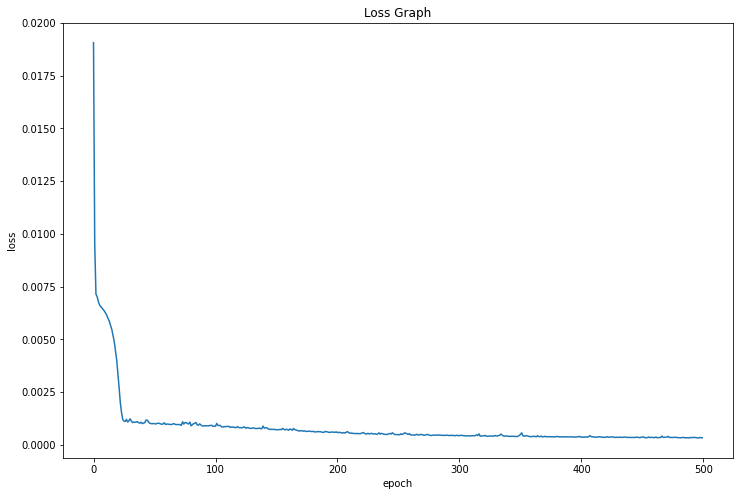

In [17]:
# 모델 생성 및 학습
rnn_model = VanillaRNN(input_size=input_size, hidden_size=hidden_size, sequence_length=sequence_length, num_layers=num_layers, device=device).to(device)
trainModel(rnn_model, trainloader, 500)

In [18]:
# 파이토치 모델 저장
PATH = "./models/stock_rnn.pth" # .pth 파일은 모델이 저장될 파일 (Inference:추론)을 원할 경우 *.pth파일 형식으로 저장
torch.save(rnn_model.state_dict(), PATH)

In [19]:
# np.linspace(시작값, 종료값, 원소개수) => ex) (0, 1, 10) 10개의 0~2 사이의 순차적인 유리수를 반환
np.linspace(0,2,10)

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

In [22]:
concatdata = torch.utils.data.ConcatDataset([trainset, testset])
data_loader = DataLoader(concatdata, batch_size=100)

In [24]:
# 주가 그리기
def draw_stockChart(model, data_loader):
    with torch.no_grad():
        pred = []
        model.eval()
        for data in data_loader:
            inputs, labels = data
            outputs = model.forward(inputs)
            pred += outputs.cpu().tolist()

    plt.figure(figsize=(20, 10))
    plt.plot(np.ones(100)*len(trainset), np.linspace(0,1,100), "--", linewidth=0.6) # 훈련 데이터 기준선
    # 실제값, 5개 틱데이터를 학습하고 예측을 했음으로 처음 5개 틱은 제외하고 그려준다.
    plt.plot(df['Close'][sequence_length:].values, "--")  
    plt.plot(pred, 'b', linewidth=0.6)  # 예측값
    plt.legend(['train boundary', 'actual', 'prediction'])
    plt.show()

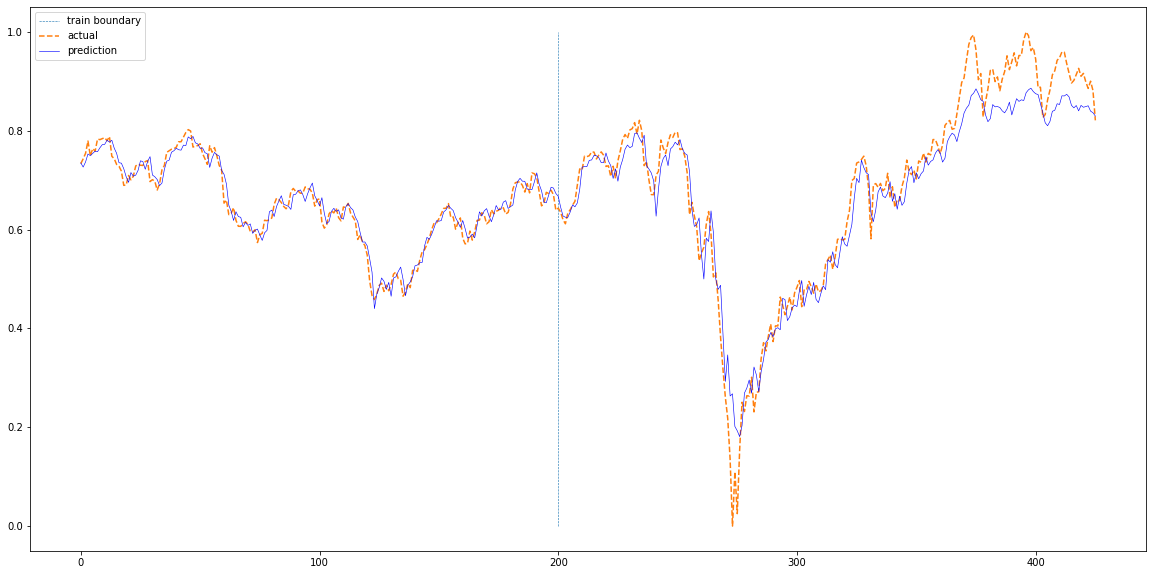

In [25]:
draw_stockChart(rnn_model, data_loader)

#### 7.2 LSTM과 GRU
##### 7.2.2 LSTM(Long Short-Term Memory)

In [35]:
# LSTM 클래스 
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
        super(LSTM, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size*sequence_length, 1), nn.Sigmoid())
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device)
        c0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device) # 셀상태 초기값
        
        out , _ = self.rnn(x, (h0, c0))
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)
        return out

epoch: 0, loss: 0.02315408755093813
epoch: 10, loss: 0.006449752137996256
epoch: 20, loss: 0.005592724867165088
epoch: 30, loss: 0.0017942043603397905
epoch: 40, loss: 0.0011352017929311842
epoch: 50, loss: 0.0010577717912383378
epoch: 60, loss: 0.001008921948960051
epoch: 70, loss: 0.0010152943257708102
epoch: 80, loss: 0.001012501452350989
epoch: 90, loss: 0.0009593122988007963
epoch: 100, loss: 0.0009571660193614662
epoch: 110, loss: 0.0009563820669427515
epoch: 120, loss: 0.0009502864093519747
epoch: 130, loss: 0.000982839218340814
epoch: 140, loss: 0.0008875629282556474
epoch: 150, loss: 0.0008833190193399787
epoch: 160, loss: 0.0008979904931038618
epoch: 170, loss: 0.0008563498820876702
epoch: 180, loss: 0.0009070687287021428
epoch: 190, loss: 0.0008109693677397445
epoch: 200, loss: 0.0007863854931201786
epoch: 210, loss: 0.0007821709790732711
epoch: 220, loss: 0.000754895422141999
epoch: 230, loss: 0.0007286173713509925
epoch: 240, loss: 0.0007188937539467588
epoch: 250, loss: 0

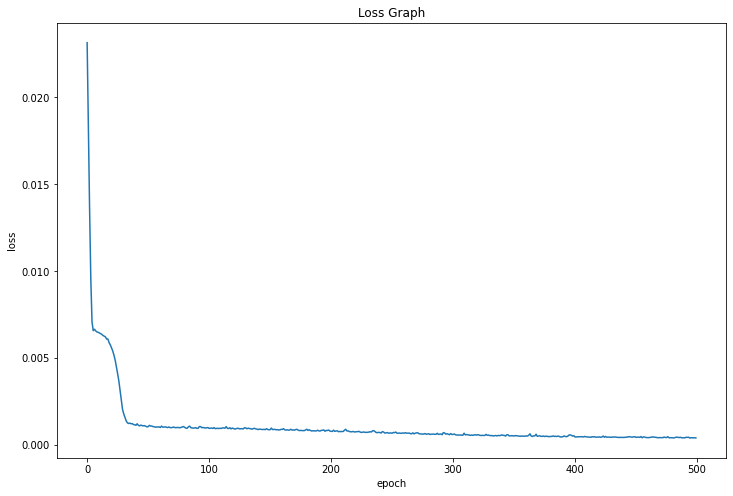

In [36]:
# 모델 생성 및 학습
lstm_model = LSTM(input_size=input_size, hidden_size=hidden_size, sequence_length=sequence_length, num_layers=num_layers, device=device).to(device)
trainModel(lstm_model, trainloader, 500)

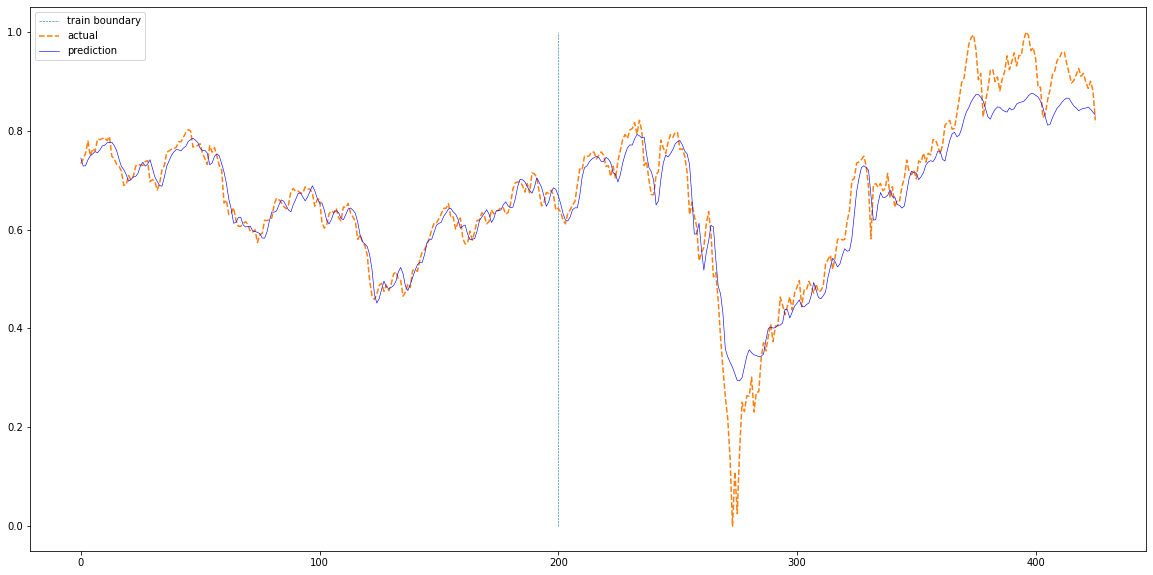

In [37]:
draw_stockChart(lstm_model, data_loader)

##### 7.2.3 GRU(Gated Recurrent Units)

In [38]:
# GRU 클래스 
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
        super(GRU, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size*sequence_length, 1), nn.Sigmoid())
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device)
        out , _ = self.rnn(x, h0,)
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)
        return out

epoch: 0, loss: 0.019057647325098515
epoch: 10, loss: 0.006203869893215597
epoch: 20, loss: 0.0049380365991964935
epoch: 30, loss: 0.0010787517414428294
epoch: 40, loss: 0.0009852494986262172
epoch: 50, loss: 0.0009492085402598605
epoch: 60, loss: 0.0009757797699421645
epoch: 70, loss: 0.0009249328577425331
epoch: 80, loss: 0.0008824982505757362
epoch: 90, loss: 0.0009091657295357436
epoch: 100, loss: 0.000836158002493903
epoch: 110, loss: 0.0008181009790860117
epoch: 120, loss: 0.0008227637183154002
epoch: 130, loss: 0.0007640933734364807
epoch: 140, loss: 0.0008090679999440909
epoch: 150, loss: 0.0006996118201641366
epoch: 160, loss: 0.0006778583250707015
epoch: 170, loss: 0.000645915901986882
epoch: 180, loss: 0.000638242150307633
epoch: 190, loss: 0.0005793429969344288
epoch: 200, loss: 0.0005619711635517887
epoch: 210, loss: 0.0005891247827094048
epoch: 220, loss: 0.0005215921744820661
epoch: 230, loss: 0.000508089063805528
epoch: 240, loss: 0.0005328764818841591
epoch: 250, loss:

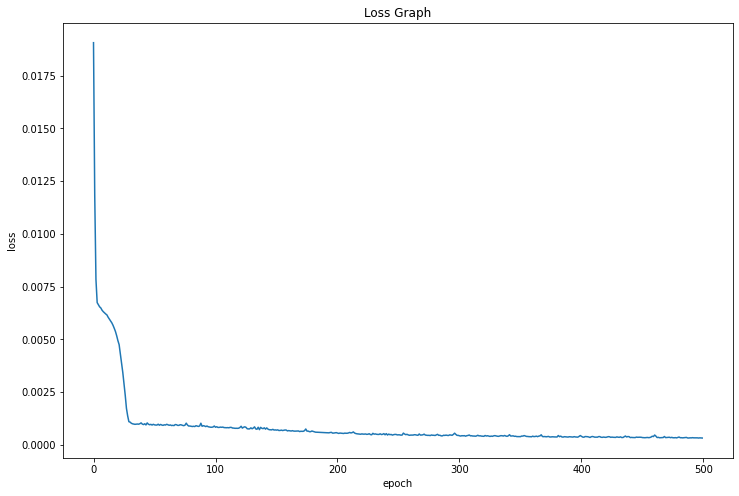

In [40]:
# 모델 생성 및 학습
gru_model = GRU(input_size=input_size, hidden_size=hidden_size, sequence_length=sequence_length, num_layers=num_layers, device=device).to(device)
trainModel(gru_model, trainloader, 500)

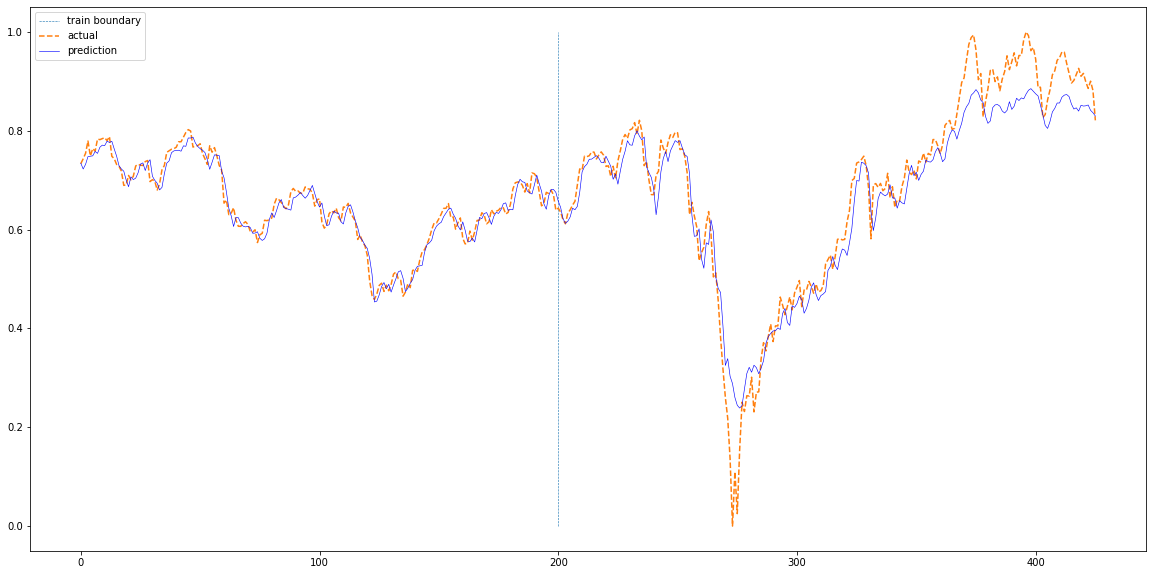

In [41]:
draw_stockChart(gru_model, data_loader)

#### 7.3 Bi-LSTM
##### 7.3.1 Bi-LSTM 구현

In [42]:
import torchvision

In [43]:
# MNIST 데이터 불러오기
tensor_mode = torchvision.transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root="./data", train=True, transform=tensor_mode, download=True)
testset = torchvision.datasets.MNIST(root="./data", train=False, transform=tensor_mode, download=True)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [63]:
60000 % 128

96

In [56]:
# Bi-LSTM 모델 구축
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, seq_length, num_classes, device):
        super(BiLSTM, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.seq_length = seq_length
        self.num_classes = num_classes
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        # => 입력 데이터의 형태는  (배치크기 x 시점의 수 x 입력의 크기)
        # 시점의 수 = 시퀀스의 수 = 시계열의 길이

        # bidirectional = True 설정으로 양방향 이 설정되었음으로 
        # 출력값의 행태는 (시계열의 길이, 은닉상태의 크기) x 2(정방향, 역방향)
        self.fc = nn.Linear(seq_length*hidden_size*2, num_classes)

    def forward(self, x):
        # 셀과 은닉층의 초기값도 양방향으로 인해 x2
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(self.device)
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(self.device)

        out, _ = self.lstm(x, (h0, c0))
        out = out.reshape(-1, self.seq_length*hidden_size*2)
        out = self.fc(out)
        return out

In [57]:
# 하이퍼 파라미터
sequence_length = trainset.data.size(1) # 시계열의 길이 -> 이미지 행(y축) 개수
input_size = trainset.data.size(2) # 입력의 크기 -> 이미지의 열(x축) 개수
num_layers = 2
hidden_size = 12
num_classes = 10


In [58]:
# 모델, 손실함수, 최적화 기법
biLstm_model = BiLSTM(input_size, hidden_size, num_layers, sequence_length, num_classes, device).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(biLstm_model.parameters(), lr=1e-5)

In [65]:
# 모델 학습 함수(MNIST 용)
def trainModel_mnist(model, dataloader, criterion, optimizer, epoch):    
    loss_stack = []
    for ep in range(epoch):
        batch_loss = 0.0
        batch_count = len(dataloader)
        for batch_data in dataloader:
            optimizer.zero_grad()
            inputs, labels = batch_data[0].squeeze(1), batch_data[1] 
            # batch_data[0].squeeze(1) -> (배치사이즈, 채널, 행, 열) -> (배치사이즈, 행, 열) 로 변환
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model.forward(inputs)           
            loss = criterion(outputs, labels)            
            loss.backward()
            optimizer.step()
            batch_loss += loss.item()
        loss = batch_loss / batch_count
        loss_stack.append(loss)
        if ep % 10 == 0:
            print(f"epoch: {ep}, loss: {loss}")
    plt.figure(figsize=(12, 8))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Graph")
    plt.plot(loss_stack)
    plt.show()


epoch: 0, loss: 2.2826137222460847
epoch: 10, loss: 1.109879272578876
epoch: 20, loss: 0.601780877502234
epoch: 30, loss: 0.4228631656434236
epoch: 40, loss: 0.3365208147876044
epoch: 50, loss: 0.28453992493053487


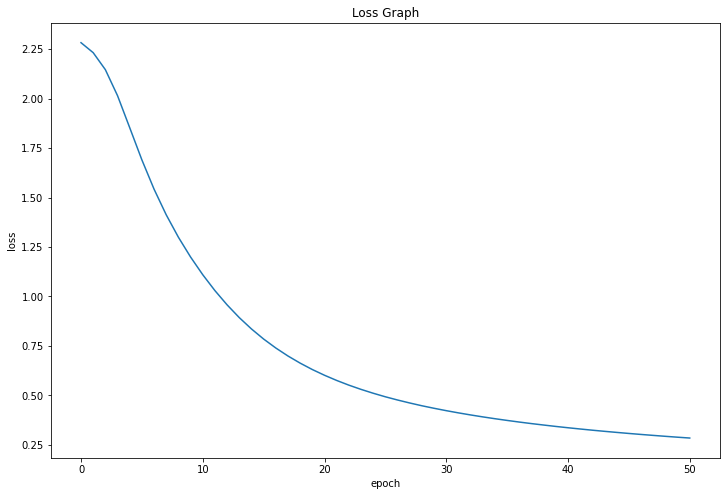

In [66]:
trainModel_mnist(biLstm_model, trainloader, criterion, optimizer, 51)

In [68]:
def accuracy_mnist(model, dataloader):
    # 평가하기
    correct = 0
    total = 0

    with torch.no_grad():
        model.eval()
        for data in dataloader:
            inputs, labels = data[0].squeeze(1), data[1]
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model.forward(inputs)
            _, predicted = torch.max(outputs, 1)        
            total += labels.size(0)
            correct += (labels == predicted).sum().item()

    print("Test accuracy: %.2f%%" %( (correct/total)*100 ) )
    model.train() # evaluation 이 끝나면 다시 train mode로 변경해줌

In [69]:
accuracy_mnist(biLstm_model, testloader)

Test accuracy: 92.15%


In [70]:
accuracy_mnist(biLstm_model, trainloader)

Test accuracy: 91.66%
